In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]



In [2]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [3]:
y_score

array([[-0.76301132, -0.36482547,  0.12386354],
       [-0.20224493, -0.63144366, -0.16612302],
       [ 0.11801481, -0.80263073, -0.32055874],
       [-0.90780855, -0.12395478,  0.02199789],
       [-0.01116192, -0.27913475, -0.71889214],
       [-0.6048727 , -0.34730509, -0.05859016],
       [ 0.02283491, -0.24506467, -0.79111998],
       [-0.61076876,  0.18264917, -0.57199363],
       [-0.37572754, -0.24059516, -0.38933694],
       [-0.47017411, -0.25745136, -0.27510839],
       [-0.42224234, -0.30270719, -0.27995197],
       [-0.3355867 , -0.7030665 ,  0.02530178],
       [-0.22723929, -0.64062258, -0.13456902],
       [-0.07856729, -0.46354017, -0.45918364],
       [-0.53383361, -0.2653183 , -0.20023832],
       [ 0.12163662, -0.56706353, -0.56980985],
       [-0.71356947, -0.04226738, -0.24297128],
       [-0.55111511, -0.13784913, -0.31370595],
       [ 0.37991331, -0.99673302, -0.39090964],
       [-0.11107635, -0.91349462,  0.03129167],
       [-0.70713712, -0.06436533, -0.214

In [4]:
type(y_score[0][0])

numpy.float64

In [5]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [6]:
y_test[:, 0]

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0])

In [7]:
y_score[:, 0]

array([-0.76301132, -0.20224493,  0.11801481, -0.90780855, -0.01116192,
       -0.6048727 ,  0.02283491, -0.61076876, -0.37572754, -0.47017411,
       -0.42224234, -0.3355867 , -0.22723929, -0.07856729, -0.53383361,
        0.12163662, -0.71356947, -0.55111511,  0.37991331, -0.11107635,
       -0.70713712, -0.02392675, -0.25045747,  0.12675547, -0.68210402,
       -0.08001795, -0.03259341, -0.04953425, -0.12974835, -0.19299299,
       -0.3619768 , -0.22818639, -0.06196433, -0.52455061, -0.40026409,
       -0.35056585, -0.05770139, -1.11907501,  0.19599366, -0.04299172,
       -0.48108269,  0.1741885 , -0.41416456, -0.01053513,  0.01645355,
       -0.11932181, -0.70817199, -0.77303401, -0.61489613, -0.96334774,
       -0.31037723, -0.31952657, -0.35306417,  0.12127427, -0.6643231 ,
       -0.55149778, -0.55695146, -0.41111447, -0.49463336,  0.06910059,
       -0.23036784,  0.30342285,  0.17642852, -0.1906155 , -0.42910413,
       -0.67759563, -0.32958811, -0.97119543,  0.02088168, -0.08

In [8]:
roc_curve(y_test[:, 0], y_score[:, 0])

(array([0.        , 0.        , 0.        , 0.01851852, 0.01851852,
        0.03703704, 0.03703704, 0.05555556, 0.05555556, 0.07407407,
        0.07407407, 0.09259259, 0.09259259, 0.12962963, 0.12962963,
        0.14814815, 0.14814815, 0.2037037 , 0.2037037 , 0.27777778,
        0.27777778, 1.        ]),
 array([0.        , 0.04761905, 0.14285714, 0.14285714, 0.19047619,
        0.19047619, 0.33333333, 0.33333333, 0.38095238, 0.38095238,
        0.61904762, 0.61904762, 0.66666667, 0.66666667, 0.76190476,
        0.76190476, 0.9047619 , 0.9047619 , 0.95238095, 0.95238095,
        1.        , 1.        ]),
 array([ 1.37991331,  0.37991331,  0.24966175,  0.19599366,  0.18869727,
         0.17642852,  0.12163662,  0.12127427,  0.11801481,  0.06910059,
        -0.01116192, -0.02392675, -0.03259341, -0.04953425, -0.06196433,
        -0.07856729, -0.11107635, -0.1906155 , -0.19299299, -0.23036784,
        -0.25045747, -1.11907501]))

In [9]:
type(y_test[0][0])

numpy.int32

In [10]:
print(fpr[0])
print()
print(tpr[0])
print()

print(auc(fpr[0], tpr[0]))

[0.         0.         0.         0.01851852 0.01851852 0.03703704
 0.03703704 0.05555556 0.05555556 0.07407407 0.07407407 0.09259259
 0.09259259 0.12962963 0.12962963 0.14814815 0.14814815 0.2037037
 0.2037037  0.27777778 0.27777778 1.        ]

[0.         0.04761905 0.14285714 0.14285714 0.19047619 0.19047619
 0.33333333 0.33333333 0.38095238 0.38095238 0.61904762 0.61904762
 0.66666667 0.66666667 0.76190476 0.76190476 0.9047619  0.9047619
 0.95238095 0.95238095 1.         1.        ]

0.9126984126984127


In [11]:
fpr

{0: array([0.        , 0.        , 0.        , 0.01851852, 0.01851852,
        0.03703704, 0.03703704, 0.05555556, 0.05555556, 0.07407407,
        0.07407407, 0.09259259, 0.09259259, 0.12962963, 0.12962963,
        0.14814815, 0.14814815, 0.2037037 , 0.2037037 , 0.27777778,
        0.27777778, 1.        ]),
 1: array([0.        , 0.        , 0.        , 0.02222222, 0.02222222,
        0.11111111, 0.11111111, 0.17777778, 0.17777778, 0.2       ,
        0.2       , 0.24444444, 0.24444444, 0.26666667, 0.26666667,
        0.37777778, 0.37777778, 0.42222222, 0.42222222, 0.48888889,
        0.48888889, 0.55555556, 0.55555556, 0.62222222, 0.62222222,
        0.64444444, 0.64444444, 0.66666667, 0.66666667, 0.73333333,
        0.73333333, 0.75555556, 0.75555556, 0.88888889, 0.88888889,
        1.        ]),
 2: array([0.        , 0.        , 0.        , 0.01960784, 0.01960784,
        0.07843137, 0.07843137, 0.09803922, 0.09803922, 0.11764706,
        0.11764706, 0.1372549 , 0.1372549 , 0.15686

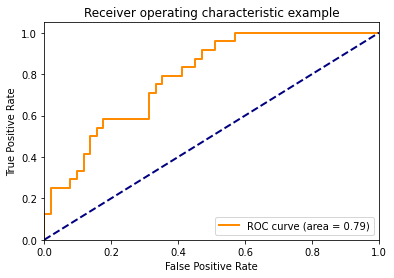

In [12]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

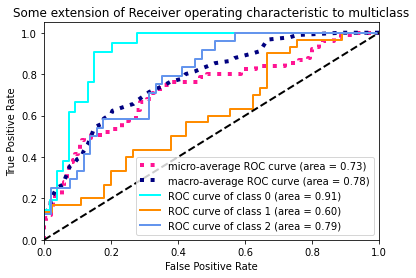

In [13]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [14]:
import csv
import re
import math
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("..") # adds higher directory to python modules path

from LoaderPACK.Loader import testload_5min
from LoaderPACK.Accuarcy_finder import Accuarcy_find_tester
import torch
import matplotlib.pyplot as plt

device = "cpu"

if device == "cpu":
    fl = torch.FloatTensor
    it = torch.LongTensor
else:
    fl = torch.cuda.FloatTensor
    it = torch.cuda.LongTensor

    # "C:/Users/Marc/Desktop/data/val_model_data"
    # "C:/Users/Marc/Desktop/data/train_model_data"

load_file = testload_5min(path = "C:/Users/Marc/Desktop/data/val_model_data",
                          series_dict = 'val_series_length.pickle',
                          size = (28, 22, 549200), #size = (195, 22, 2060000),
                          device = device) # total val series = 2642
                                           # total train series = 18497

loader = torch.utils.data.DataLoader(load_file,
                                     batch_size=1,
                                     shuffle=False,
                                     num_workers=0)

it = iter(loader)

ind, tar, meta = next(it)

data = (ind.view(-1) - ind.view(-1).mean())/ind.view(-1).std()

x = data.view(1, -1).transpose(1, 0).numpy()

target = tar.view(-1)

tar = torch.stack((~target.bool(), target)).view(2, -1)
target = tar.transpose(1, 0)
y = target.numpy()

C:\Users\Marc\Documents\GitHub\Artefact-Rejection\ROC\..\LoaderPACK\Loader.py:408: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_numpy.cpp:178.)
  inp = torch.Tensor(self.input_data[exp_nr, chan, cut_point:cut_point+60*5*200]).clone().detach()


In [15]:
from LoaderPACK.LSTM_net import LSTM_net
from LoaderPACK.naive_models import thenos
from LoaderPACK.Loader import testload_5min
from LoaderPACK.tester import val_tester
from LoaderPACK.Unet import Unet
from LoaderPACK.Accuarcy_finder import Accuarcy_find
from LoaderPACK.Accuarcy_upload import Accuarcy_upload
from multiprocessing import Process

batch_size = 1

model = LSTM_net(batch_size=batch_size, device=device).to(device)
x = torch.load(f"C:/Users/Marc/Desktop/network/network_LSTM-510.pt")
x = torch.load(r"C:\Users\Marc\Desktop\network\networks_515\network_LSTM-loss-epk-94.pt")
model.load_state_dict(x)
model.to(device)

LSTM_net(
  (lstm): LSTM(1, 5, proj_size=1, num_layers=2, batch_first=True, bidirectional=True)
  (soft): Softmax(dim=1)
)

In [16]:
with torch.no_grad():
    y_pred = model(ind)

In [17]:
y_pred.shape

torch.Size([1, 2, 60000])

In [18]:
pred = y_pred.view(2, -1).transpose(1, 0).numpy()

In [19]:
pred.shape

(60000, 2)

In [20]:
pred = np.float64(pred)

In [21]:
pred

array([[4.15919785e-04, 9.99584138e-01],
       [2.21436872e-04, 9.99778569e-01],
       [1.95816348e-04, 9.99804199e-01],
       ...,
       [9.99725163e-01, 2.74768070e-04],
       [9.99422789e-01, 5.77222614e-04],
       [9.96798098e-01, 3.20196315e-03]])

In [22]:
y = np.int32(y)

In [23]:
y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [24]:
y[:, 0]

array([0, 0, 0, ..., 1, 1, 1])

In [25]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

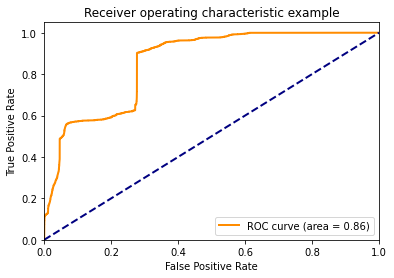

In [26]:
plt.figure()
lw = 2
plt.plot(
    fpr[1],
    tpr[1],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[1],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

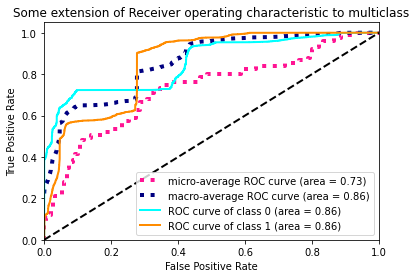

In [27]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(2):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 2

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(2), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [28]:
x_train = x[:9000]
y_train = y[:9000]

x_test = x[59000:]
y_test = y[59000:]

TypeError: unhashable type: 'slice'

In [ ]:
y_test.shape

In [ ]:

classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=random_state)
)

y_score = classifier.fit(x_train, y_train).decision_function(x_test)

In [ ]:
y_score

In [ ]:
y_score.shape

In [ ]:
y_test.shape

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
roc_curve(y_test[:, 1], y_score[:, 1])

In [ ]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X[:, 0].reshape(-1, 1), y)


In [ ]:
#X[:, 0].reshape(-1, 1)

In [ ]:
X[0]

In [ ]:
clf.predict([[X[0, 2]]])



In [ ]:
X[:, 0].reshape(1, -1)

In [ ]:
y.shape

In [ ]:
import csv
import re
import math
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("..") # adds higher directory to python modules path

from LoaderPACK.Loader import testload_5min
from LoaderPACK.Accuarcy_finder import Accuarcy_find_tester
import torch
import matplotlib.pyplot as plt

device = "cpu"

if device == "cpu":
    fl = torch.FloatTensor
    it = torch.LongTensor
else:
    fl = torch.cuda.FloatTensor
    it = torch.cuda.LongTensor

    # "C:/Users/Marc/Desktop/data/val_model_data"
    # "C:/Users/Marc/Desktop/data/train_model_data"

load_file = testload_5min(path = "C:/Users/Marc/Desktop/data/val_model_data",
                          series_dict = 'val_series_length.pickle',
                          size = (28, 22, 549200), #size = (195, 22, 2060000),
                          device = device) # total val series = 2642
                                           # total train series = 18497

loader = torch.utils.data.DataLoader(load_file,
                                     batch_size=1,
                                     shuffle=False,
                                     num_workers=0)

it = iter(loader)

ind, tar, meta = next(it)

target = torch.zeros(1)

while target.sum() == 0:

    data = (ind.view(-1).abs()/200)
    data = data.view(-1,1).numpy()

    target = np.int32(tar.view(-1, 1).numpy())


In [ ]:
print(target.shape)

In [ ]:
data.shape

In [ ]:
print(target.sum())

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
i = 0
fpr[i], tpr[i], _ = roc_curve(target, data)
roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], thrs = roc_curve(target.ravel(), data.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
plt.figure()
lw = 2
plt.plot(
    fpr[0],
    tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[0],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(sklearn.metrics.roc_auc_score(target, pred, average = "micro"))
print(sklearn.metrics.roc_auc_score(target, pred, average = "macro"))
print(sklearn.metrics.roc_auc_score(target, pred, average = "weighted"))

In [ ]:
roc_auc[0]

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(2):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 2

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(2), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [ ]:
all_fpr

In [ ]:
import sklearn

In [ ]:
print(sklearn.metrics.roc_auc_score(y_test.ravel(), y_score.ravel(), average = "weighted"))

In [ ]:
print(sklearn.metrics.roc_auc_score(y_test, y_score, average = "micro"))
print(sklearn.metrics.roc_auc_score(y_test, y_score, average = "macro"))
print(sklearn.metrics.roc_auc_score(y_test, y_score, average = "weighted"))

In [ ]:
print(sklearn.metrics.roc_auc_score(y_test[:, 0], y_score[:, 0], average = "weighted"))

In [ ]:
auc(fpr["micro"], tpr["micro"])

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
X, y = load_breast_cancer(return_X_y=True)

kk = 4

clf = LogisticRegression(solver="liblinear", random_state=0).fit(X[:, kk].reshape(-1, 1), y)
pred =clf.predict_proba(X[:, kk].reshape(-1, 1))[:, 1]
roc_auc_score(y, pred)



In [ ]:
pred

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
i = 0
fpr[i], tpr[i], _ = roc_curve(y.reshape(-1, 1), pred.reshape(-1, 1))
roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], thrs = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(
    fpr[0],
    tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[0],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

print(roc_auc["micro"])
print(roc_auc[0])

In [29]:
import sys
sys.path.append("..") # adds higher directory to python modules path

from LoaderPACK.LSTM_net import LSTM_net
import torch

In [30]:
device = "cpu"
batch_size = 2
model = LSTM_net(batch_size=batch_size, device=device).to(device)

In [31]:
print(model)

LSTM_net(
  (lstm): LSTM(1, 5, proj_size=1, num_layers=2, batch_first=True, bidirectional=True)
  (soft): Softmax(dim=1)
)


In [73]:
j = 0
for i in model.parameters():
    j += len(i.data.view(-1))
print(j)


380


In [74]:
from LoaderPACK.Unet_leaky import Unet_leaky, Unet_leaky_lstm
model = Unet_leaky_lstm(n_channels=1, batch_size=batch_size, \
                            device=device).to(device)
j = 0
for i in model.parameters():
    j += len(i.data.view(-1))
print(j)

264671


In [81]:
ind = torch.rand(2, 1, 60000)*500

In [82]:
ind.std()

tensor(144.6266)

In [83]:
model(ind)

tensor([[[0.4265, 0.4272, 0.2824,  ..., 0.3755, 0.3845, 0.3766],
         [0.5735, 0.5728, 0.7176,  ..., 0.6245, 0.6155, 0.6234]],

        [[0.4134, 0.3891, 0.4295,  ..., 0.2583, 0.3283, 0.3856],
         [0.5866, 0.6109, 0.5705,  ..., 0.7417, 0.6717, 0.6144]]],
       grad_fn=<SoftmaxBackward0>)

In [45]:
import torch.nn as nn
rnn = nn.LSTMCell(10, 5)

In [46]:
for i in rnn.parameters():
    print(i.shape)

torch.Size([20, 10])
torch.Size([20, 5])
torch.Size([20])
torch.Size([20])


In [59]:
rnn = nn.LSTM(10, 20, 2)
input = torch.randn(5, 3, 10)
h0 = torch.randn(2, 3, 20)
c0 = torch.randn(2, 3, 20)

output, (hn, cn) = rnn(input)

In [61]:
print(output)

tensor([[[-2.6201e-03, -4.1974e-02,  2.9910e-02,  9.0037e-03,  2.2162e-02,
          -2.2394e-02, -3.4240e-02, -8.3921e-02, -4.8716e-02,  3.3766e-02,
          -3.4178e-02, -3.6662e-02, -9.1674e-02,  7.7038e-03, -6.7526e-02,
           6.7092e-02,  1.7219e-02,  1.1181e-02, -4.7330e-02,  3.7754e-02],
         [ 3.4871e-03, -3.6973e-02,  3.3317e-02, -5.3684e-03, -7.3140e-03,
          -6.2442e-02, -2.3279e-02, -7.4165e-02, -4.7286e-02,  1.8571e-02,
          -1.7593e-02, -4.3914e-02, -1.0174e-01, -1.2033e-02, -6.3998e-02,
           4.5557e-02,  1.6792e-02, -1.3521e-02,  6.1255e-03,  3.2869e-02],
         [ 6.0295e-04, -1.1890e-02,  3.1506e-02, -2.4827e-02, -2.8531e-02,
          -1.9473e-02, -1.9811e-02, -4.5870e-02, -1.1900e-02,  4.3800e-02,
          -3.8374e-02, -4.4119e-02, -1.0032e-01,  4.1938e-03, -5.1638e-02,
           3.4024e-02,  4.3413e-02, -2.7212e-04,  2.5095e-03,  2.2281e-02]],

        [[-1.7413e-04, -6.2655e-02,  5.2918e-02, -9.8274e-03,  1.5605e-02,
          -2.2781e-0